# kNN Classification Model

## Objectives

- Demonstrate the application of the k-Nearest Neighbors (kNN) algorithm for classification.
- Compare the effects of using different k values on model accuracy.
- To evaluate model performance, utilize various metrics like accuracy, precision, recall, and F1 score.

## Background

The k-Nearest Neighbors algorithm is a simple and effective machine learning technique for classification and regression tasks. In k-NN classification, the output is a class membership determined by a majority vote of the k nearest neighbors to a point.

## Datasets Used

- Synthetic Blob Data: Generated to simulate a binary classification scenario.
- Raisin Dataset: Consists of physical measurements of two varieties of raisins used for classification.

## Introduction

The k-Nearest Neighbors algorithm (KNN) is a Machine Learning algorithm that solves classification and regression problems. The method does not require highly complex calculations and is easy to interpret. It relies on the idea that similar data points are closer than the points that are far away from each other. It evaluates the k nearest neighbors of a given case to get conclusions.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 10)
import matplotlib.pyplot as plt
import seaborn as sns
# set default figure size
sns.set_theme(rc={"figure.figsize":(6, 4)}) 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Some Simple KNN Models

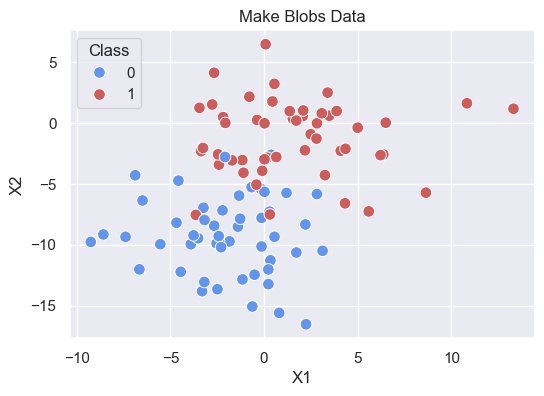

In [3]:
# The data
X, cl = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=3)
dfb = pd.DataFrame()
dfb['X1'] = X[:, 0]
dfb['X2'] = X[:, 1]
dfb['Class'] = cl
sns.scatterplot(
    x=dfb.X1, 
    y=dfb.X2, 
    s=70, 
    hue=dfb.Class, 
    palette=['cornflowerblue', 'indianred']
).set_title("Make Blobs Data");

In [4]:
X = dfb[['X1','X2']]    # Feature Matrix
y = dfb.Class           # Target variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
print(f'Train = {len(X_train)} cases \t Test = {len(X_test)} cases')

Train = 80 cases 	 Test = 20 cases


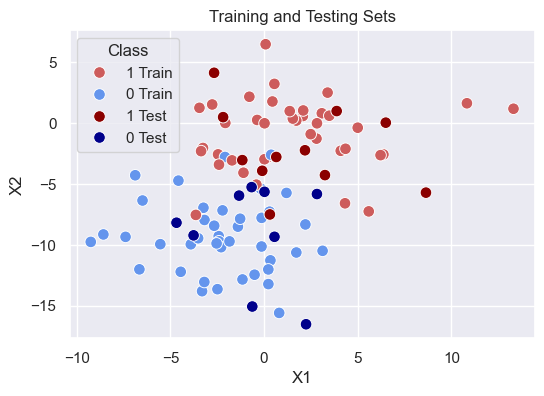

In [6]:
# Plotting the training and test sets
sns.scatterplot(
    x=X_train.X1, 
    y=X_train.X2, 
    s=70, 
    hue=y_train.replace({0:'0 Train', 1:'1 Train'}), 
    palette=['indianred', 'cornflowerblue']
)
sns.scatterplot(
    x=X_test.X1,  
    y=X_test.X2,  
    s=70, 
    hue=y_test.replace({0:'0 Test', 1:'1 Test'}),    
    palette=['darkred', 'darkblue']
).set_title("Training and Testing Sets");

In [7]:
# Saving training and testing data
data_train = pd.concat([X_train, y_train], axis=1)
data_test  = pd.concat([X_test, y_test], axis=1)

### kNN (k = 5)

In [8]:
# Initialize and train the kNN model
kNN_k3 = KNeighborsClassifier(n_neighbors=3)
kNN_k3.fit(X=X_train, y=y_train);

In [9]:
# Predictions with training cases 
prob = kNN_k3.predict_proba(X_train).round(3)
data_train['prob_0_k3'] = prob[:, 0]
data_train['prob_1_k3'] = prob[:, 1]
data_train['Class_k3'] = kNN_k3.predict(X_train)
data_train.head()

,X1,X2,Class,prob_0_k3,prob_1_k3,Class_k3
85,-2.459759,-2.573120,1,0.333,0.667,1
28,1.194007,-5.736837,0,0.667,0.333,0
8,-3.239853,-6.954107,0,0.667,0.333,0
11,4.999948,-0.385664,1,0.000,1.000,1
63,0.080990,6.462332,1,0.000,1.000,1


In [10]:
# Predictions on unseen cases 
prob = kNN_k3.predict_proba(X_test)
data_test['prob_0_k3'] = prob[:, 0]
data_test['prob_1_k3'] = prob[:, 1]
data_test['Class_k3']  = kNN_k3.predict(X_test)
data_test.head()

,X1,X2,Class,prob_0_k3,prob_1_k3,Class_k3
26,-0.100188,-3.921491,1,0.000000,1.000000,1
80,2.240493,-16.512285,0,1.000000,0.000000,0
82,8.644564,-5.713072,1,0.000000,1.000000,1
68,2.182810,-2.237404,1,0.333333,0.666667,1
77,-3.767508,-9.218345,0,1.000000,0.000000,0


### kNN (k = 7)

In [11]:
# Initialize and train the kNN model
kNN_k7 = KNeighborsClassifier(n_neighbors=7)
kNN_k7.fit(X=X_train, y=y_train);

In [12]:
# Predictions with training cases 
prob = kNN_k7.predict_proba(X_train).round(3)
data_train['prob_0_k7'] = prob[:, 0]
data_train['prob_1_k7'] = prob[:, 1]
data_train['Class_k7'] = kNN_k7.predict(X_train)
data_train.head()

,X1,X2,Class,prob_0_k3,prob_1_k3,Class_k3,prob_0_k7,prob_1_k7,Class_k7
85,-2.459759,-2.573120,1,0.333,0.667,1,0.143,0.857,1
28,1.194007,-5.736837,0,0.667,0.333,0,0.714,0.286,0
8,-3.239853,-6.954107,0,0.667,0.333,0,0.857,0.143,0
11,4.999948,-0.385664,1,0.000,1.000,1,0.000,1.000,1
63,0.080990,6.462332,1,0.000,1.000,1,0.000,1.000,1


In [13]:
# Predictions on unseen cases 
prob = kNN_k7.predict_proba(X_test)
data_test['prob_0_k7'] = prob[:, 0]
data_test['prob_1_k7'] = prob[:, 1]
data_test['Class_k7']  = kNN_k7.predict(X_test)
data_test.head()

,X1,X2,Class,prob_0_k3,prob_1_k3,Class_k3,prob_0_k7,prob_1_k7,Class_k7
26,-0.100188,-3.921491,1,0.000000,1.000000,1,0.285714,0.714286,1
80,2.240493,-16.512285,0,1.000000,0.000000,0,1.000000,0.000000,0
82,8.644564,-5.713072,1,0.000000,1.000000,1,0.000000,1.000000,1
68,2.182810,-2.237404,1,0.333333,0.666667,1,0.142857,0.857143,1
77,-3.767508,-9.218345,0,1.000000,0.000000,0,1.000000,0.000000,0


### Comparing the two models

In [14]:
# Generating new data
new_data = pd.DataFrame()
new_data['X1'] = np.random.uniform(data_train.X1.min(), data_train.X1.max(), size=1000)
new_data['X2'] = np.random.uniform(data_train.X2.min(), data_train.X2.max(), size=1000)
new_k3_y  = kNN_k3.predict(new_data)
new_k7_y  = kNN_k7.predict(new_data)
new_data['k3_y'] = new_k3_y
new_data['k7_y'] = new_k7_y

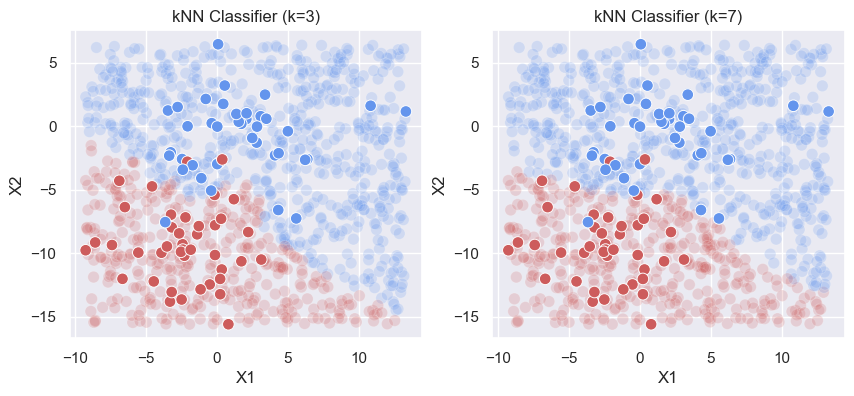

In [15]:
# Plotting boundaries
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.scatterplot(
    x=new_data.X1,  
    y=new_data.X2, 
    s=70, 
    hue=new_data.k3_y, 
    alpha=0.2, 
    palette=['indianred', 'cornflowerblue'], 
    legend=False
).set_title("kNN Classifier (k=3)")
sns.scatterplot(
    x=X_train.X1, 
    y=X_train.X2, 
    s=70, 
    hue=y_train, 
    palette=['indianred', 'cornflowerblue'], 
    legend=False
);

plt.subplot(122)
sns.scatterplot(
    x=new_data.X1,  
    y=new_data.X2, 
    s=70, 
    hue=new_data.k7_y, 
    alpha=0.2, 
    palette=['indianred', 'cornflowerblue'], 
    legend=False
).set_title("kNN Classifier (k=7)")
sns.scatterplot(
    x=X_train.X1, 
    y=X_train.X2, 
    s=70, 
    hue=y_train, 
    palette=['indianred', 'cornflowerblue'], 
    legend=False
);

A confusion matrix is a table used to evaluate the performance of a classification model by comparing the predicted and actual class labels of a set of test data.

Cases on the main diagonal are correctly classified.

In [16]:
# Confusion Matrix for k=3 model
confusion_matrix(
    y_true=data_test.Class,     # True labels
    y_pred=data_test.Class_k3   # Predicted labels
)

array([[ 8,  1],
       [ 1, 10]], dtype=int64)

In [17]:
# Confusion Matrix for k=7 model
confusion_matrix(
    y_true=data_test.Class,     # True labels
    y_pred=data_test.Class_k7   # Predicted labels
)

array([[ 8,  1],
       [ 1, 10]], dtype=int64)

Classification accuracy is a performance metric that measures how well a classification model can accurately classify or predict the correct class label for a given input. It is the ratio of correctly classified instances to the total number of cases in the dataset.

In [18]:
# The accuracy
print(f'Training Set (kNN Model k=3) Accuracy = {kNN_k3.score(X=X_train, y=y_train)*100:.2f}%')
print(f'Testing Set  (kNN Model k=3) Accuracy = {kNN_k3.score(X=X_test, y=y_test)*100:.2f}%')
print('-----')
print(f'Training Set (kNN Model k=7) Accuracy = {kNN_k7.score(X=X_train, y=y_train)*100:.2f}%')
print(f'Testing Set  (kNN Model k=7) Accuracy = {kNN_k7.score(X=X_test, y=y_test)*100:.2f}%')

Training Set (kNN Model k=3) Accuracy = 96.25%
Testing Set  (kNN Model k=3) Accuracy = 90.00%
-----
Training Set (kNN Model k=7) Accuracy = 95.00%
Testing Set  (kNN Model k=7) Accuracy = 90.00%


## KNN: The Raisin Dataset

The dataset contains information about two varieties of raisins (Kecimen and Besni) grown in Turkey.

In [19]:
dfr = pd.read_csv('Raisin.csv')
print(dfr.shape)
dfr.head()

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


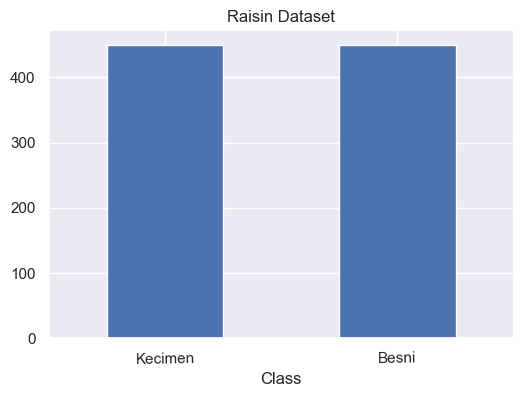

In [20]:
dfr.Class.value_counts().plot(kind='bar', rot=True, title='Raisin Dataset');

In [21]:
# Recoding the class variable
label_to_number = {'Kecimen': 0, 'Besni': 1}
dfr['Besni'] = dfr['Class'].map(label_to_number)
dfr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Besni
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen,0


In [22]:
# Target variable
yr = dfr.Besni                              

In [23]:
# Removing the classes variables
Xr = dfr.drop(['Class','Besni'], axis=1) 
Xr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


Predictor variables have very different scales; it is recommended to standardize them!

In [24]:
# Standardizing the Feature Matrix
ss = StandardScaler()
Xr = pd.DataFrame(ss.fit_transform(Xr), columns=Xr.columns)
Xr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639


In [25]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=23)
print(f'Train = {len(Xr_train)} cases \t Test = {len(Xr_test)} cases')

Train = 720 cases 	 Test = 180 cases


In [26]:
# Saving training and testing data
data_train_r = pd.concat([Xr_train, yr_train], axis=1)
data_test_r =  pd.concat([Xr_test, yr_test], axis=1)

### kNN (k = 3)

In [27]:
# Initializing and training the model
kNNr_k3 = KNeighborsClassifier(n_neighbors=3)
kNNr_k3.fit(X=Xr_train, y=yr_train);

In [28]:
# Predictions with training cases 
prob = kNNr_k3.predict_proba(Xr_train)
data_train_r['prob_K_k3'] = prob[:, 0]
data_train_r['prob_B_k3'] = prob[:, 1]
data_train_r['Besni_pred_k3'] = kNNr_k3.predict(Xr_train)
# Visualizing the last four columns of the DataFrame
data_train_r.iloc[:,-4:].head()

,Besni,prob_K_k3,prob_B_k3,Besni_pred_k3
516,1,0.000000,1.000000,1
502,1,0.333333,0.666667,1
535,1,0.000000,1.000000,1
151,0,1.000000,0.000000,0
292,0,1.000000,0.000000,0


In [29]:
# Make predictions on unseen data 
prob = kNNr_k3.predict_proba(Xr_test)
data_test_r['prob_K_k3'] = prob[:, 0]
data_test_r['prob_B_k3'] = prob[:, 1]
data_test_r['Besni_pred_k3'] = kNNr_k3.predict(Xr_test)
# Visualizing the last four columns of the DataFrame
data_test_r.iloc[:, -4:].head()

,Besni,prob_K_k3,prob_B_k3,Besni_pred_k3
774,1,0.000000,1.000000,1
737,1,1.000000,0.000000,0
753,1,0.000000,1.000000,1
890,1,0.333333,0.666667,1
428,0,0.666667,0.333333,0


### kNN (k = 5)

In [30]:
# Initializing and training the model
kNNr_k5 = KNeighborsClassifier(n_neighbors=5)
kNNr_k5.fit(X=Xr_train, y=yr_train);

In [31]:
# Predictions with training cases 
prob = kNNr_k5.predict_proba(Xr_train)
data_train_r['prob_K_k5'] = prob[:, 0]
data_train_r['prob_B_k5'] = prob[:, 1]
data_train_r['Besni_pred_k5'] = kNNr_k5.predict(Xr_train)
# Visualizing the last four columns of the DataFrame
data_train_r.iloc[:, -7:].head()

,Besni,prob_K_k3,prob_B_k3,Besni_pred_k3,prob_K_k5,prob_B_k5,Besni_pred_k5
516,1,0.000000,1.000000,1,0.0,1.0,1
502,1,0.333333,0.666667,1,0.4,0.6,1
535,1,0.000000,1.000000,1,0.2,0.8,1
151,0,1.000000,0.000000,0,1.0,0.0,0
292,0,1.000000,0.000000,0,0.8,0.2,0


In [32]:
# Make predictions on unseen data 
prob = kNNr_k5.predict_proba(Xr_test)
data_test_r['prob_K_k5'] = prob[:, 0]
data_test_r['prob_B_k5'] = prob[:, 1]
data_test_r['Besni_pred_k5'] = kNNr_k5.predict(Xr_test)
# Visualizing the last four columns of the DataFrame
data_test_r.iloc[:, -7:].head()

,Besni,prob_K_k3,prob_B_k3,Besni_pred_k3,prob_K_k5,prob_B_k5,Besni_pred_k5
774,1,0.000000,1.000000,1,0.0,1.0,1
737,1,1.000000,0.000000,0,1.0,0.0,0
753,1,0.000000,1.000000,1,0.2,0.8,1
890,1,0.333333,0.666667,1,0.4,0.6,1
428,0,0.666667,0.333333,0,0.8,0.2,0


### Comparing the two models

In [33]:
# Confusion Matrix
confusion_matrix(
    y_true=data_test_r.Besni,           # True labels
    y_pred=data_test_r.Besni_pred_k3    # Predicted labels
)

array([[91,  6],
       [18, 65]], dtype=int64)

In [34]:
# Confusion Matrix
confusion_matrix(
    y_true=data_test_r.Besni,           # True labels
    y_pred=data_test_r.Besni_pred_k5    # Predicted labels
)

array([[93,  4],
       [18, 65]], dtype=int64)

In [35]:
# The accuracy
print(f'Training Set (kNN Model k=3) Accuracy = {kNNr_k3.score(X=Xr_train,  y=yr_train)*100:.2f}%')
print(f'Testing Set  (kNN Model k=3) Accuracy = {kNNr_k3.score(X=Xr_test,  y=yr_test)*100:.2f}%')
print('-----')
print(f'Training Set (kNN Model k=5) Accuracy = {kNNr_k5.score(X=Xr_train,  y=yr_train)*100:.2f}%')
print(f'Testing Set  (kNN Model k=5) Accuracy = {kNNr_k5.score(X=Xr_test,  y=yr_test)*100:.2f}%')

Training Set (kNN Model k=3) Accuracy = 90.14%
Testing Set  (kNN Model k=3) Accuracy = 86.67%
-----
Training Set (kNN Model k=5) Accuracy = 88.33%
Testing Set  (kNN Model k=5) Accuracy = 87.78%


### Choosing the best k-value

There are several measures for evaluating the model quality.

- `Accuracy`: The proportion of correctly classified instances (i.e., the number of true positives and true negatives) out of the total number of cases. 

- `Precision`: The proportion of true positives out of the instances that are classified as positive (i.e., the sum of true positives and false positives). Precision is a valuable metric when the cost of false positives is high.

- `Recall`: The proportion of true positives out of the actual positive instances (i.e., the sum of true positives and false negatives). Recall is a valuable metric when the cost of false negatives is high.

- `F1 score`: The harmonic mean of precision and recall. It is a balanced metric that takes both precision and recall into account.

In [36]:
# Define a range of k values to try
k_range = list(range(1, 31))

Let's compute the kNN model for different k-values and get the accuracy with the testing set.

In [37]:
# Creating a list for storing accuracy, precision, recall, and f1 scores
acc_scores = np.array([]) 
prc_scores = np.array([]) 
rec_scores = np.array([]) 
f1_scores = np.array([]) 
for k in k_range:                                   # Checking all options between k=1 and k=30 
    model = KNeighborsClassifier(n_neighbors = k)   # Defining the model
    model.fit(Xr_train, yr_train)                   # Fitting the model with train data 
    pred_k = model.predict(Xr_test)                 # Making predictions on testing data
    # Storing the accuracy values
    acc_scores = np.append(acc_scores, accuracy_score(y_true=yr_test, y_pred=pred_k))        
    prc_scores = np.append(prc_scores, precision_score(y_true=yr_test, y_pred=pred_k))        
    rec_scores = np.append(rec_scores, recall_score(y_true=yr_test, y_pred=pred_k))    
    f1_scores  = np.append(f1_scores,  f1_score(y_true=yr_test, y_pred=pred_k))    

In [38]:
print(f"The optimal k value is {acc_scores.argmax()+1} with an accuracy of {acc_scores.max()*100:.2f}%")
print(f"The optimal k value is {prc_scores.argmax()+1} with a precision of {prc_scores.max()*100:.2f}%")
print(f"The optimal k value is {rec_scores.argmax()+1} with a recall of {rec_scores.max()*100:.2f}%")
print(f"The optimal k value is {f1_scores.argmax()+1} with f1 score of {f1_scores.max()*100:.2f}%")

The optimal k value is 5 with an accuracy of 87.78%
The optimal k value is 4 with a precision of 98.33%
The optimal k value is 3 with a recall of 78.31%
The optimal k value is 5 with f1 score of 85.53%


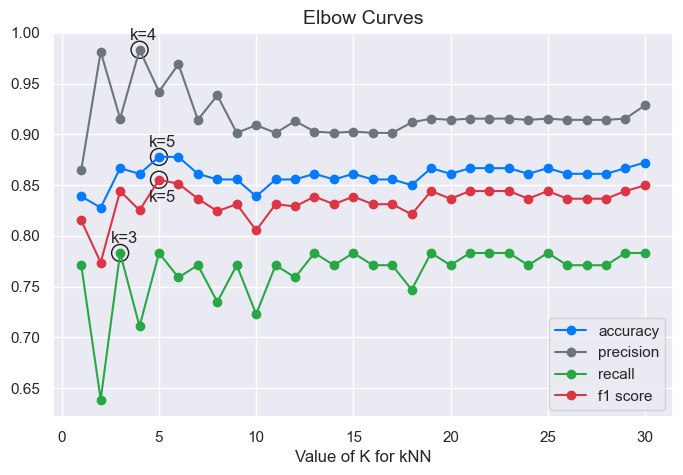

In [39]:
plt.figure(figsize=(8,5))

plt.plot(
    k_range, 
    acc_scores, 
    marker='o', 
    markersize=6, 
    color='#007bff', 
    label='accuracy'
)
plt.scatter(
    acc_scores.argmax() + 1, 
    acc_scores.max(), 
    s=150, 
    linewidth=1, 
    edgecolors='k', 
    facecolors='none'
)
plt.text(
    acc_scores.argmax() + 0.5, 
    acc_scores.max() + 0.01, 
    f'k={acc_scores.argmax()+1}'
)

plt.plot(
    k_range, 
    prc_scores, 
    marker='o', 
    markersize=6, 
    color='#6c757d', 
    label='precision'
)
plt.scatter(
    prc_scores.argmax() + 1, 
    prc_scores.max(), 
    s=150, 
    linewidth=1, 
    edgecolors='k', 
    facecolors='none'
)
plt.text(
    prc_scores.argmax() + 0.5, 
    prc_scores.max() + 0.01, 
    f'k={prc_scores.argmax() + 1}'
)

plt.plot(
    k_range, 
    rec_scores, 
    marker='o', 
    markersize=6, 
    color='#28a745', 
    label='recall'
)
plt.scatter(
    rec_scores.argmax() + 1, 
    rec_scores.max(), 
    s=150, 
    linewidth=1, 
    edgecolors='k', 
    facecolors='none'
)
plt.text(
    rec_scores.argmax() + 0.5, 
    rec_scores.max() + 0.01, 
    f'k={rec_scores.argmax() + 1}'
)

plt.plot(
    k_range, 
    f1_scores, 
    marker='o', 
    markersize=6, 
    color='#dc3545', 
    label='f1 score'
)
plt.scatter(
    f1_scores.argmax() + 1, 
    f1_scores.max(), 
    s=150, 
    linewidth=1, 
    edgecolors='k', 
    facecolors='none'
)
plt.text(
    f1_scores.argmax() + 0.5, 
    f1_scores.max() - 0.022, 
    f'k={f1_scores.argmax() + 1}'
)

plt.title('Elbow Curves', fontsize=14)
plt.xlabel('Value of K for kNN')
plt.legend();

Accuracy, precision, f1, and recall are performance metrics used to evaluate the performance of classification models. While they can provide valuable insights into the quality of a model, they are not directly related to determining the optimal value of `k` in kNN.

The optimal value of `k` in kNN depends on the specific dataset and the problem you are trying to solve. To determine the optimal value, you can use a validation technique such as cross-validation to evaluate the model's performance for different values of `k`. Let's do it!

In [40]:
# Create a general kNN classification model
kNNr = KNeighborsClassifier()

In [41]:
# Create a dictionary of hyperparameters to search
param_grid = dict(n_neighbors=k_range)

In [42]:
# Use GridSearchCV to find the optimal k value
grid_acc = GridSearchCV(kNNr, param_grid, cv=10, scoring='accuracy')
grid_acc.fit(Xr_train, yr_train)
mean_scores_acc = grid_acc.cv_results_['mean_test_score']
best_k_acc = grid_acc.best_params_['n_neighbors']
best_score_acc = grid_acc.best_score_*100
print(f"The optimal k value is {best_k_acc} with an accuracy of {best_score_acc:.2f}%")

The optimal k value is 29 with an accuracy of 86.67%


In [43]:
# Use GridSearchCV to find the optimal k value
grid_prc = GridSearchCV(kNNr, param_grid, cv=10, scoring='precision')
grid_prc.fit(Xr_train, yr_train)
mean_scores_prc = grid_prc.cv_results_['mean_test_score']
best_k_prc = grid_prc.best_params_['n_neighbors']
best_score_prc = grid_prc.best_score_*100
print(f"The optimal k value is {best_k_prc} with a precision of {best_score_prc:.2f}%")

The optimal k value is 28 with a precision of 90.12%


In [44]:
# Use GridSearchCV to find the optimal k value
grid_rec = GridSearchCV(kNNr, param_grid, cv=10, scoring='recall')
grid_rec.fit(Xr_train, yr_train)
mean_scores_rec = grid_rec.cv_results_['mean_test_score']
best_k_rec = grid_rec.best_params_['n_neighbors']
best_score_rec = grid_rec.best_score_*100
print(f"The optimal k value is {best_k_rec} with a recall of {best_score_rec:.2f}%")

The optimal k value is 15 with a recall of 84.42%


In [45]:
# Use GridSearchCV to find the optimal k value
grid_f1 = GridSearchCV(kNNr, param_grid, cv=10, scoring='f1')
grid_f1.fit(Xr_train, yr_train)
mean_scores_f1 = grid_f1.cv_results_['mean_test_score']
best_k_f1 = grid_f1.best_params_['n_neighbors']
best_score_f1 = grid_f1.best_score_*100
print(f"The optimal k value is {best_k_f1} with a f1 score of {best_score_f1:.2f}%")

The optimal k value is 17 with a f1 score of 86.34%


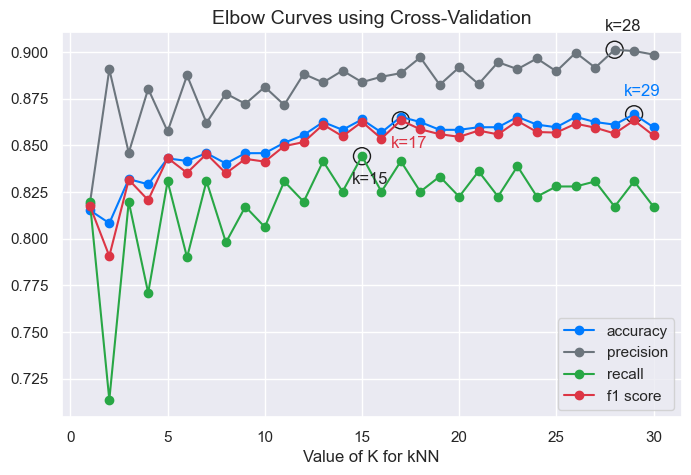

In [46]:
# Plotting the results
plt.figure(figsize=(8, 5))

plt.plot(
    k_range, 
    mean_scores_acc, 
    marker='o',
    markersize=6, 
    color='#007bff', 
    label='accuracy'
)
plt.scatter(
    grid_acc.best_params_['n_neighbors'], 
    grid_acc.best_score_, 
    s=150,
    linewidth=1, 
    edgecolors='k', 
    facecolors='none'
)
plt.text(
    mean_scores_acc.argmax() + 0.5, 
    mean_scores_acc.max() + 0.01, 
    f'k={mean_scores_acc.argmax() + 1}', 
    color='#007bff'
)

plt.plot(
    k_range, 
    mean_scores_prc, 
    marker='o',
    markersize=6, 
    color='#6c757d', 
    label='precision'
)
plt.scatter(
    grid_prc.best_params_['n_neighbors'], 
    grid_prc.best_score_, 
    s=150,
    linewidth=1, 
    edgecolors='k', 
    facecolors='none'
)
plt.text(
    mean_scores_prc.argmax() + 0.5, 
    mean_scores_prc.max() + 0.01, 
    f'k={mean_scores_prc.argmax() + 1}'
)

plt.plot(
    k_range, 
    mean_scores_rec, 
    marker='o',
    markersize=6, 
    color='#28a745', 
    label='recall'
)
plt.scatter(
    grid_rec.best_params_['n_neighbors'], 
    grid_rec.best_score_, 
    s=150,
    linewidth=1, 
    edgecolors='k', 
    facecolors='none'
)
plt.text(
    mean_scores_rec.argmax() + 0.5, 
    mean_scores_rec.max() - 0.015, 
    f'k={mean_scores_rec.argmax() + 1}'
)

plt.plot(
    k_range, 
    mean_scores_f1,  
    marker='o',
    markersize=6, 
    color='#dc3545', 
    label='f1 score'
)
plt.scatter(
    grid_f1.best_params_['n_neighbors'], 
    grid_f1.best_score_, 
    s=150,
    linewidth=1, 
    edgecolors='k', 
    facecolors='none'
)
plt.text(
    mean_scores_f1.argmax() + 0.5, 
    mean_scores_f1.max() - 0.015, 
    f'k={mean_scores_f1.argmax() + 1}', 
    color='#dc3545'
)

# Label the plot
plt.title('Elbow Curves using Cross-Validation', fontsize=14)
plt.xlabel('Value of K for kNN')

plt.legend()

As you can see, the `k` values we got using a cross-validation technique differ from those without. We should use cross-validation to determine the optimal value of `k` in k-Nearest Neighbors (kNN). The performance metric most commonly used is accuracy, although you may use other metrics such as precision, recall, or F1-score, depending on the problem. By applying cross-validation to different k values, you can estimate which k value provides the best performance measured by the chosen metric.

For the raisin dataset, accuracy is a good metric.

## Conclusions

Key Takeaways
- kNN is highly sensitive to the choice of k, with different values of k affecting model accuracy and generalization capability.
- The model performs well on synthetic data, achieving high accuracy rates in the training and testing phases.
- Standardizing features is crucial in kNN to prevent distance measures from being skewed by the scale of the data.
- Precision, recall, and F1 score are essential metrics for evaluating kNN performance, especially in imbalanced datasets where accuracy alone can be misleading.
- Cross-validation can determine the optimal k value, which helps enhance the model's performance and reliability.

## References

- CINAR I., KOKLU M. and TASDEMIR S., (2020), Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods. Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020. DOI: https://dergipark.org.tr/tr/download/article-file/1227592
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html